# WeatherPy
Create a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator by utilizing a simple Python library, the OpenWeatherMap API, and a little common sense to create a representative model of weather across world cities.

In [1]:
# import dependencies

import matplotlib.pyplot as plt
import seaborn as sns
import requests
from pprint import pprint
import time
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
import statsmodels.api as sm
from api_keys import weather_api_key

# import citipy to generate city lat/lng
from citipy import citipy

# create output for csv
output_data_file = "burns_cities.csv"

# set lat/lng ranges
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create List of Cities
Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.

In [2]:
 # create lists for cities & Lat/lng
lat_lngs = []
cities = []

# need set of random lat/lng
latitudes = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(latitudes, lngs)

# pull cities according to above
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # make sure cities aren't added twice
    if city not in cities:
        cities.append(city)

#confirm city count
len(cities)

601

# API Calls for City Weather Data
Perform a weather check on each of the cities using a series of successive API calls.
Include a print log of each city as it's being processed with the city number and city name.

In [3]:
#create lists for parsed weather data
latitudes = []
longitudes = []
temps = []
real_feel = []
humid = []
pressures = []
speeds = []
cloudiness = []
new_cities = []

#create loop to pull city information

for i in range(len(cities)):
    city = cities[i]
    
    units = "imperial"
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&units={units}&appid={weather_api_key}"

    response = requests.get(url)
#     print(response.status_code) - checking work
    
    #error check on data set
    if response.status_code == 200:
        data = response.json()
#         pprint(data) - checking work
        
        try:
            lat = data["coord"]["lat"]
            long = data["coord"]["lon"]
            temp = data["main"]["temp"]
            feels_like = data["main"]["feels_like"]
            humidity = data["main"]["humidity"]
            pressure = data["main"]["pressure"]
            speed = data["wind"]["speed"]
            clouds = data["clouds"]["all"]
            city_name = data["name"]

            latitudes.append(lat)
            longitudes.append(long)
            temps.append(temp)
            real_feel.append(feels_like)
            humid.append(humidity)
            pressures.append(pressure)
            speeds.append(speed)
            cloudiness.append(clouds)
            new_cities.append(city_name)
        except Exception as e:
            print(f"Exception for city {city}: {e}")
    
    elif response.status_code == 404:
        print(f"No data in OpenWeatherAPI for {city}")
    else:
        print(response.status_code)
        print("The API cannot find this call.")
        
    #print every 5
    if (i % 5 == 0):
        print(f"Data retreived for city index: {i} of {len(cities)}")
    
    #sleep for requests
    time.sleep(1)
        
# make the dataframe
df = pd.DataFrame()
df["City"] = new_cities
df["Latitude"] = latitudes
df["Longitude"] = longitudes
df["Temperature"] = temps
df["Feels Like"] = real_feel
df["Humidity"] = humid
df["Pressure"] = pressures
df["Wind Speed"] = speeds
df["Cloudiness"] = speeds

df.head(10)

Data retreived for city index: 0 of 601
No data in OpenWeatherAPI for amderma
Data retreived for city index: 5 of 601
Data retreived for city index: 10 of 601
Data retreived for city index: 15 of 601
No data in OpenWeatherAPI for illoqqortoormiut
Data retreived for city index: 20 of 601
No data in OpenWeatherAPI for taolanaro
Data retreived for city index: 25 of 601
No data in OpenWeatherAPI for vaitupu
No data in OpenWeatherAPI for kadykchan
Data retreived for city index: 30 of 601
Data retreived for city index: 35 of 601
Data retreived for city index: 40 of 601
No data in OpenWeatherAPI for tumannyy
Data retreived for city index: 45 of 601
Data retreived for city index: 50 of 601
Data retreived for city index: 55 of 601
Data retreived for city index: 60 of 601
No data in OpenWeatherAPI for grand river south east
Data retreived for city index: 65 of 601
No data in OpenWeatherAPI for tsihombe
No data in OpenWeatherAPI for mys shmidta
Data retreived for city index: 70 of 601
No data in 

,City,Latitude,Longitude,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness
0,Bredasdorp,-34.53,20.04,57.20,56.57,76,1010,1.12,1.12
1,Margate,51.38,1.39,51.33,46.85,65,1012,4.00,4.00
2,Saldanha,-33.01,17.94,59.00,59.31,93,1011,3.36,3.36
3,Mergen,49.18,125.22,19.53,12.06,95,1008,4.12,4.12
4,Sokoni,-6.43,39.55,76.35,79.27,88,1013,10.71,10.71
5,Tiksi,71.69,128.87,0.37,-7.65,94,1017,3.00,3.00
6,Necochea,-38.55,-58.74,62.10,56.41,73,1018,11.95,11.95
7,Cape Town,-33.93,18.42,56.52,52.12,93,1011,10.29,10.29
8,Adrar,20.50,-10.07,85.42,81.09,22,1015,4.54,4.54
9,Khorixas,-20.37,14.97,65.44,61.39,49,1015,5.44,5.44


In [4]:
df.to_csv(output_data_file, index=False) 

# Create Cities.csv
Save a CSV of all retrieved data

In [5]:
 filepath = "burns_cities.csv"
df = pd.read_csv(filepath)

df.head()

,City,Latitude,Longitude,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness
0,Bredasdorp,-34.53,20.04,57.20,56.57,76,1010,1.12,1.12
1,Margate,51.38,1.39,51.33,46.85,65,1012,4.00,4.00
2,Saldanha,-33.01,17.94,59.00,59.31,93,1011,3.36,3.36
3,Mergen,49.18,125.22,19.53,12.06,95,1008,4.12,4.12
4,Sokoni,-6.43,39.55,76.35,79.27,88,1013,10.71,10.71


In [6]:
df.shape 

(552, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         552 non-null    object 
 1   Latitude     552 non-null    float64
 2   Longitude    552 non-null    float64
 3   Temperature  552 non-null    float64
 4   Feels Like   552 non-null    float64
 5   Humidity     552 non-null    int64  
 6   Pressure     552 non-null    int64  
 7   Wind Speed   552 non-null    float64
 8   Cloudiness   552 non-null    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 38.9+ KB


In [8]:
df.describe() 

,Latitude,Longitude,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000
mean,19.586812,19.644728,58.162409,54.665489,71.641304,1013.907609,8.134529,8.134529
std,32.868769,88.988502,22.159034,26.888260,21.148296,7.917254,5.715158,5.715158
min,-54.800000,-175.200000,-24.500000,-34.510000,1.000000,983.000000,0.450000,0.450000
25%,-7.435000,-57.600000,44.600000,36.955000,60.000000,1010.000000,3.895000,3.895000
50%,25.150000,24.210000,63.030000,59.395000,77.000000,1014.000000,6.930000,6.930000
75%,47.040000,97.532500,76.587500,77.605000,87.000000,1018.000000,10.727500,10.727500
max,78.220000,179.320000,91.990000,96.130000,100.000000,1033.000000,33.330000,33.330000


# Scatter Plots
Create a series of scatter plots to showcase the following relationships:
Temperature (F) vs. Latitude, 
Humidity (%) vs. Latitude, 
Cloudiness (%) vs. Latitude, 
Wind Speed (mph) vs. Latitude

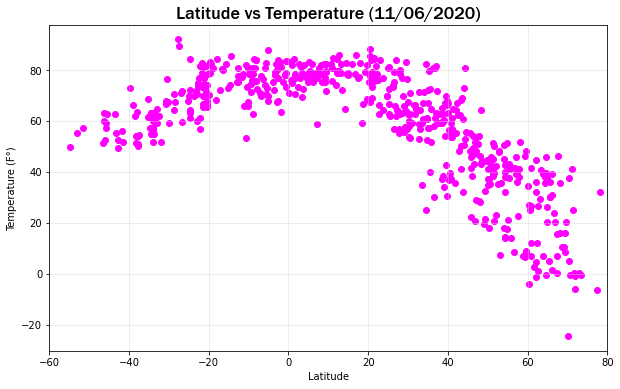

In [9]:
#This plot is showcasing a linear relationshipt between latitude and Temprature. 
#The slope indicates that temprature goes up as we near the equator and back down as we move away from it.


plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Temperature, color = "magenta")
plt.title("Latitude vs Temperature (11/06/2020)", fontsize=18, fontweight="bold", fontname = "Franklin Gothic Medium")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F°)")
plt.grid(color="lightgrey", alpha = 0.5)

plt.xlim(-60, 80)

plt.show()

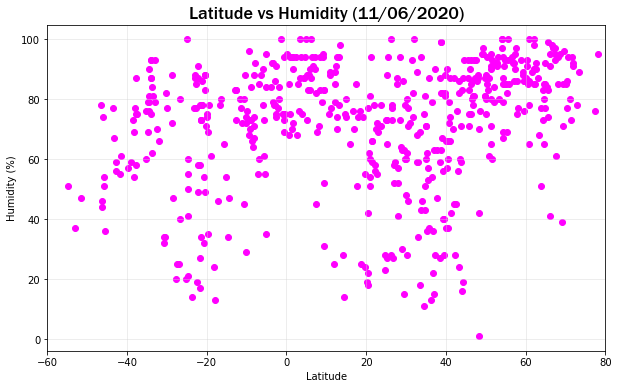

In [10]:
#This plot is demonstarting that there is little to no relationship between latitude and humidity.
#humidity appears to be spread out widely

plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Humidity, color = "magenta")
plt.title("Latitude vs Humidity (11/06/2020)", fontsize=18, fontweight="bold", fontname = "Franklin Gothic Medium")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(color="lightgrey", alpha = 0.5)

plt.xlim(-60, 80)

plt.show()

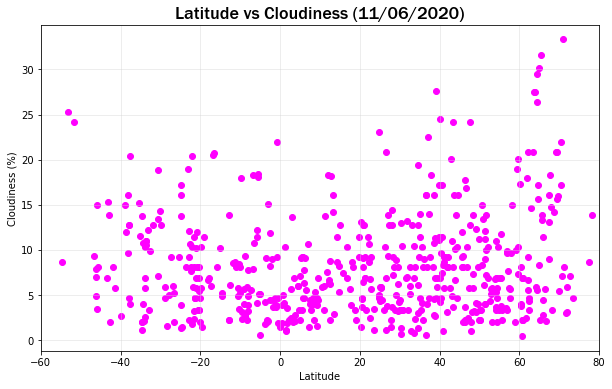

In [11]:
#This plot is demonstarting that there is a slight linear relationship to cloudiness and latitude.
#Cloudiness appears to be spread out widely but decreases in volume at peak latitudes

plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Cloudiness, color = "magenta")
plt.title("Latitude vs Cloudiness (11/06/2020)", fontsize=18, fontweight="bold", fontname = "Franklin Gothic Medium")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(color="lightgrey", alpha = 0.5)

plt.xlim(-60, 80)

plt.show()

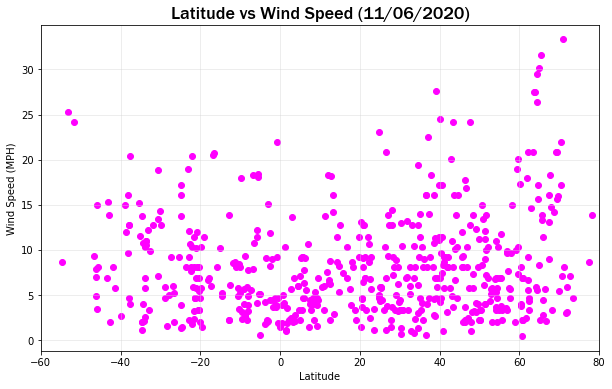

In [12]:
#This plot is demonstarting that there is a slight linear relationship to wind speed and latitude.
#Cloudiness appears to be spread out widely but decreases in volume at peak latitudes
    
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df["Wind Speed"], color = "magenta")
plt.title("Latitude vs Wind Speed (11/06/2020)", fontsize=18, fontweight="bold", fontname = "Franklin Gothic Medium")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(color="lightgrey", alpha = 0.5)

plt.xlim(-60, 80)

plt.show()

# Linear Regression
Run linear regression on each relationship. This time, separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

Northern Hemisphere - Temperature (F) vs. Latitude, 
Southern Hemisphere - Temperature (F) vs. Latitude, 
Northern Hemisphere - Humidity (%) vs. Latitude, 
Southern Hemisphere - Humidity (%) vs. Latitude, 
Northern Hemisphere - Cloudiness (%) vs. Latitude, 
Southern Hemisphere - Cloudiness (%) vs. Latitude, 
Northern Hemisphere - Wind Speed (mph) vs. Latitude, 
Southern Hemisphere - Wind Speed (mph) vs. Latitude

In [13]:
#create hemisphere data frame

df["Hemisphere_NS"] = ["Northern" if x > 0 else "Southern" for x in df.Latitude]
df["Hemisphere_WE"] = ["Eastern" if x > 0 else "Western" for x in df.Longitude]

df.head()

,City,Latitude,Longitude,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness,Hemisphere_NS,Hemisphere_WE
0,Bredasdorp,-34.53,20.04,57.20,56.57,76,1010,1.12,1.12,Southern,Eastern
1,Margate,51.38,1.39,51.33,46.85,65,1012,4.00,4.00,Northern,Eastern
2,Saldanha,-33.01,17.94,59.00,59.31,93,1011,3.36,3.36,Southern,Eastern
3,Mergen,49.18,125.22,19.53,12.06,95,1008,4.12,4.12,Northern,Eastern
4,Sokoni,-6.43,39.55,76.35,79.27,88,1013,10.71,10.71,Southern,Eastern


In [14]:
corrs = df.corr()
corrs

,Latitude,Longitude,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness
Latitude,1.000000,-0.094111,-0.641527,-0.639046,0.219462,-0.034660,0.102969,0.102969
Longitude,-0.094111,1.000000,-0.145476,-0.086773,0.218668,0.101556,-0.279040,-0.279040
Temperature,-0.641527,-0.145476,1.000000,0.982996,-0.317795,-0.034989,-0.053170,-0.053170
Feels Like,-0.639046,-0.086773,0.982996,1.000000,-0.196796,-0.019631,-0.184889,-0.184889
Humidity,0.219462,0.218668,-0.317795,-0.196796,1.000000,-0.031762,-0.080965,-0.080965
Pressure,-0.034660,0.101556,-0.034989,-0.019631,-0.031762,1.000000,-0.233106,-0.233106
Wind Speed,0.102969,-0.279040,-0.053170,-0.184889,-0.080965,-0.233106,1.000000,1.000000
Cloudiness,0.102969,-0.279040,-0.053170,-0.184889,-0.080965,-0.233106,1.000000,1.000000


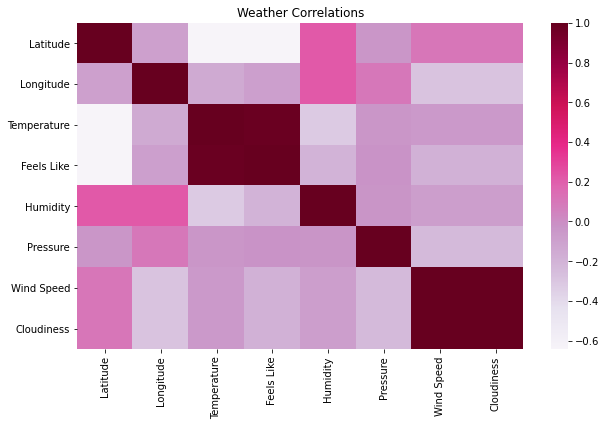

In [15]:
#visualize the data - helpful

plt.figure(figsize=(10,6))

sns.heatmap(corrs, cmap="PuRd")

plt.title("Weather Correlations")
plt.show()

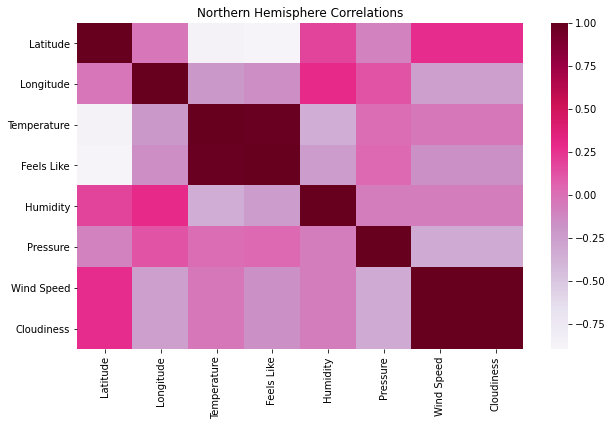

In [16]:
corrs2 = df.loc[df.Hemisphere_NS == "Northern"].corr()

plt.figure(figsize=(10,6))

sns.heatmap(corrs2,cmap="PuRd")

plt.title("Northern Hemisphere Correlations")
plt.show()

In [17]:
target = df.Temperature
feature = df.Latitude

In [18]:
# created stats model - defining x & y

X = sm.add_constant(feature)
Y = target
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     384.7
Date:                Fri, 06 Nov 2020   Prob (F-statistic):           2.47e-65
Time:                        16:13:04   Log-Likelihood:                -2346.6
No. Observations:                 552   AIC:                             4697.
Df Residuals:                     550   BIC:                             4706.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.6336      0.843     79.027      0.000      64.977      68.290
Latitude      -0.4325      0.022    -19.613      0.000      -0.476      -0.389
==============================================================================
Omnibus:                       34.129   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.727
Skew:                          -0.636   Prob(JB):                     3.90e-09
Kurtosis:                       2.741   Cond. No.                         44.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
#create line regression

slope = results.params[1]
intercept = results.params[0]

regress_values = feature * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'y = -0.43x + 66.63'

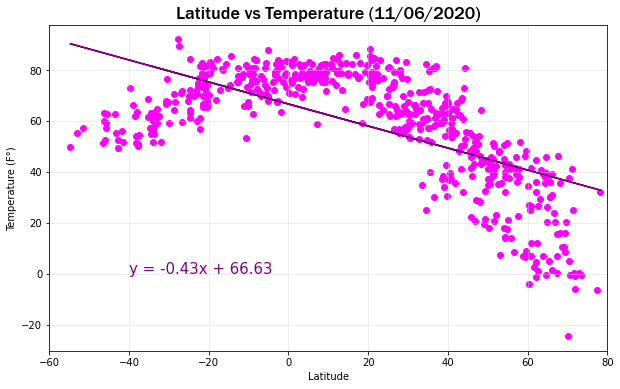

In [20]:
#create overall latitude v. temprature for comparison to N/S hempispheres - demonstrates the linear relationship

plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Temperature, color = "magenta")
plt.title("Latitude vs Temperature (11/06/2020)", fontsize=18, fontweight="bold", fontname = "Franklin Gothic Medium")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F°)")
plt.grid(color="lightgrey", alpha = 0.5)

plt.xlim(-60, 80)
plt.plot(feature, regress_values, color="purple")
plt.annotate(line_eq,(-40, 0),fontsize=15,color="purple")

plt.show()

In [21]:
#create line regression models for graphs

def doRegressionWork(hemisphere, df, inp_target):
    #filter to the correct hemispheres
    if hemisphere in ["Northern", "Southern"]:
        df_sub = df.loc[df.Hemisphere_NS == hemisphere]
    else:
        df_sub = df.loc[df.Hemisphere_WE == hemisphere]
        
    target = df_sub[inp_target]
    feature = df_sub.Latitude
    
    X = sm.add_constant(feature)
    Y = target
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())
    
    # grab the equation
    slope = results.params[1]
    intercept = results.params[0]

    regress_values = feature * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(line_eq)
    
    # create visualization
    plt.figure(figsize=(10,6))

    plt.scatter(df_sub.Latitude, df_sub[inp_target], color = "magenta")
    plt.title(f"Latitude vs {inp_target}(11/06/2020)", fontsize=18, fontweight="bold", fontname = "Franklin Gothic Medium")
    plt.xlabel("Latitude")
    plt.ylabel(inp_target)
    plt.grid(color="lightgrey", alpha = 0.5)
    
    plt.plot(feature, regress_values, color="purple")

    plt.show()

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     1006.
Date:                Fri, 06 Nov 2020   Prob (F-statistic):          8.50e-109
Time:                        16:13:05   Log-Likelihood:                -1508.5
No. Observations:                 382   AIC:                             3021.
Df Residuals:                     380   BIC:                             3029.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         91.8270      1.385     66.284      0.0

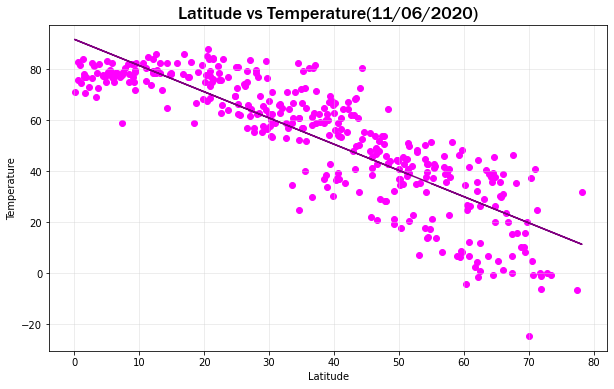

In [22]:
doRegressionWork("Northern", df, "Temperature") 

#demonstrates the negative linear realationship between latitude and temprature.
#the higher the higher the latitude in the Northern Hemisphere, the lower the temprature.

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     157.2
Date:                Fri, 06 Nov 2020   Prob (F-statistic):           7.00e-26
Time:                        16:13:05   Log-Likelihood:                -576.90
No. Observations:                 170   AIC:                             1158.
Df Residuals:                     168   BIC:                             1164.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.9697      1.042     77.703      0.0

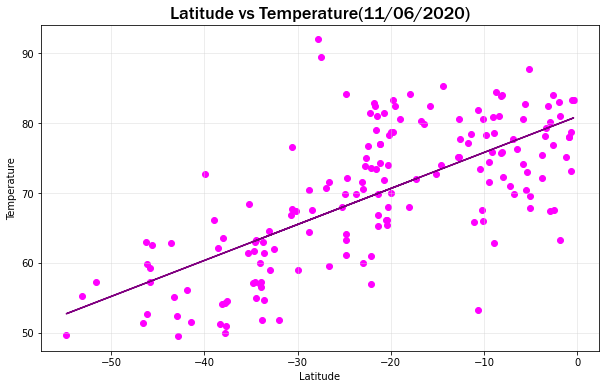

In [23]:
doRegressionWork("Southern", df, "Temperature") 
#demonstrates the negative linear realationship between latitude and temprature.
#the lower the latitude in the Southern Hemisphere, the lower the temprature.
#opposite of the above result

                            OLS Regression Results                            
Dep. Variable:               Humidity   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     12.78
Date:                Fri, 06 Nov 2020   Prob (F-statistic):           0.000395
Time:                        16:13:05   Log-Likelihood:                -1703.0
No. Observations:                 382   AIC:                             3410.
Df Residuals:                     380   BIC:                             3418.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.2687      2.305     28.751      0.0

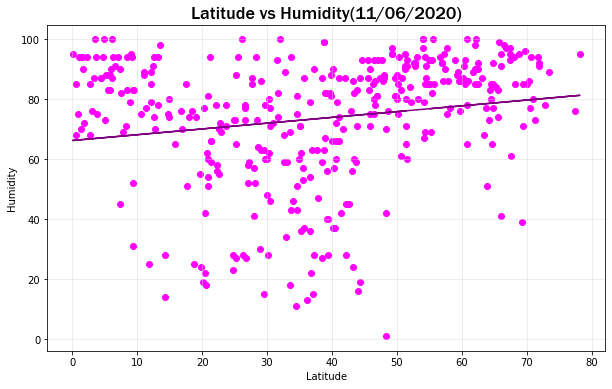

In [24]:
doRegressionWork("Northern", df, "Humidity") 

                            OLS Regression Results                            
Dep. Variable:               Humidity   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     10.76
Date:                Fri, 06 Nov 2020   Prob (F-statistic):            0.00126
Time:                        16:13:06   Log-Likelihood:                -747.16
No. Observations:                 170   AIC:                             1498.
Df Residuals:                     168   BIC:                             1505.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.1894      2.837     26.504      0.0

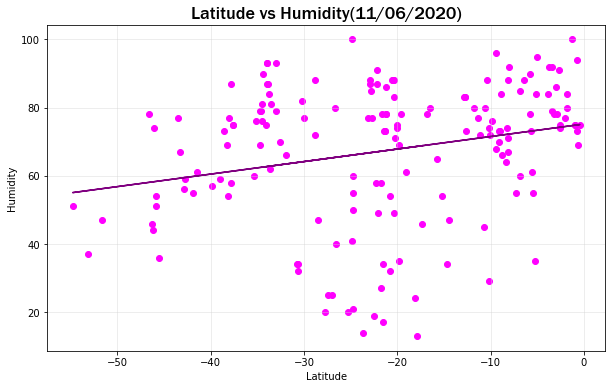

In [25]:
doRegressionWork("Southern", df, "Humidity") 

                            OLS Regression Results                            
Dep. Variable:             Cloudiness   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     29.72
Date:                Fri, 06 Nov 2020   Prob (F-statistic):           9.00e-08
Time:                        16:13:06   Log-Likelihood:                -1205.7
No. Observations:                 382   AIC:                             2415.
Df Residuals:                     380   BIC:                             2423.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1624      0.627      8.233      0.0

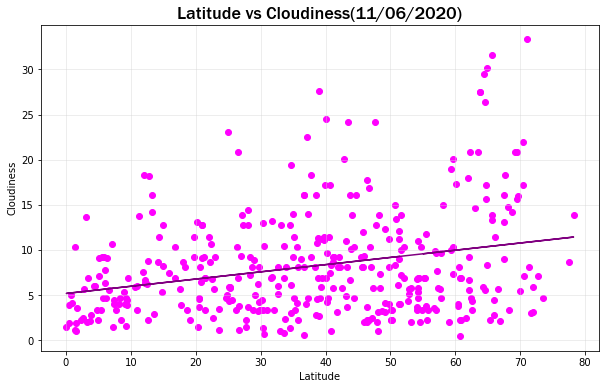

In [26]:
doRegressionWork("Northern", df, "Cloudiness") 

                            OLS Regression Results                            
Dep. Variable:             Cloudiness   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     8.402
Date:                Fri, 06 Nov 2020   Prob (F-statistic):            0.00425
Time:                        16:13:07   Log-Likelihood:                -519.13
No. Observations:                 170   AIC:                             1042.
Df Residuals:                     168   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1935      0.742      8.349      0.0

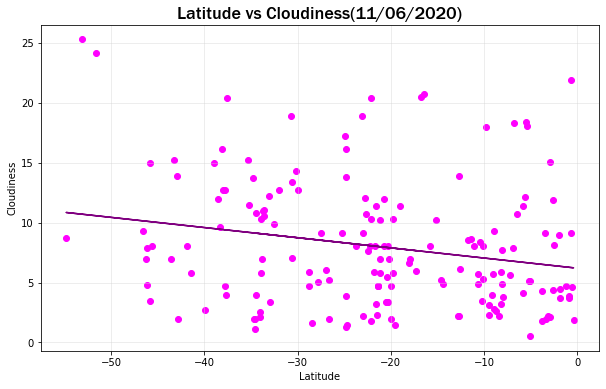

In [27]:
doRegressionWork("Southern", df, "Cloudiness") 

                            OLS Regression Results                            
Dep. Variable:             Wind Speed   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     29.72
Date:                Fri, 06 Nov 2020   Prob (F-statistic):           9.00e-08
Time:                        16:13:07   Log-Likelihood:                -1205.7
No. Observations:                 382   AIC:                             2415.
Df Residuals:                     380   BIC:                             2423.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1624      0.627      8.233      0.0

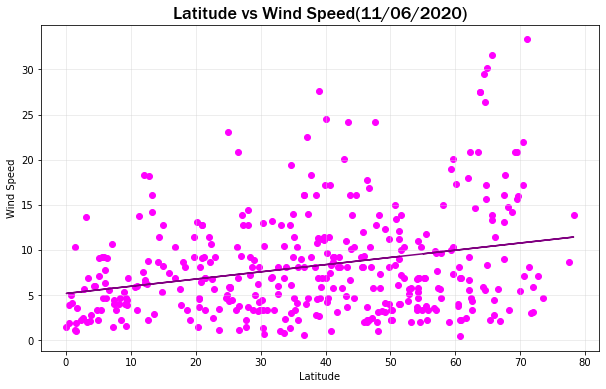

In [28]:
doRegressionWork("Northern", df, "Wind Speed") 

                            OLS Regression Results                            
Dep. Variable:             Wind Speed   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     8.402
Date:                Fri, 06 Nov 2020   Prob (F-statistic):            0.00425
Time:                        16:13:08   Log-Likelihood:                -519.13
No. Observations:                 170   AIC:                             1042.
Df Residuals:                     168   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1935      0.742      8.349      0.0

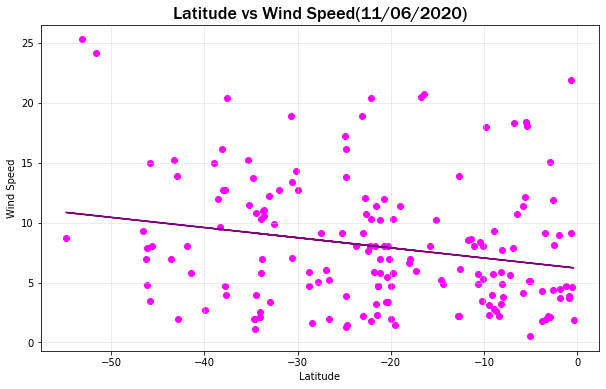

In [29]:
doRegressionWork("Southern", df, "Wind Speed") 